In [1]:
! pip install wordcloud networkx


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\rituparn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import networkx as nx
from datetime import datetime

In [3]:
# Load the data
df_behav = pd.read_csv(r'G:\My Drive\MyWork\Bakhish_consumerdownturn\consumer_behaviour.csv')
df_downt = pd.read_csv(r'G:\My Drive\MyWork\Bakhish_consumerdownturn\economic_downturn.csv')

In [4]:
print(df_behav.columns)
print(df_downt.columns)

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')
Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')


In [5]:
# Add a source identifier to each dataframe before combining
df_behav['Dataset'] = 'Behavior'
df_downt['Dataset'] = 'Downturn'

# Combine the dataframes for comparative analysis
df_combined = pd.concat([df_behav, df_downt])


In [6]:

# Data preprocessing
# Convert Year to numeric (handling any non-numeric values)
df_combined['Year'] = pd.to_numeric(df_combined['Year'], errors='coerce')
df_combined = df_combined.dropna(subset=['Year'])
df_combined['Year'] = df_combined['Year'].astype(int)

# Convert Cited by to numeric
df_combined['Cited by'] = pd.to_numeric(df_combined['Cited by'], errors='coerce').fillna(0).astype(int)

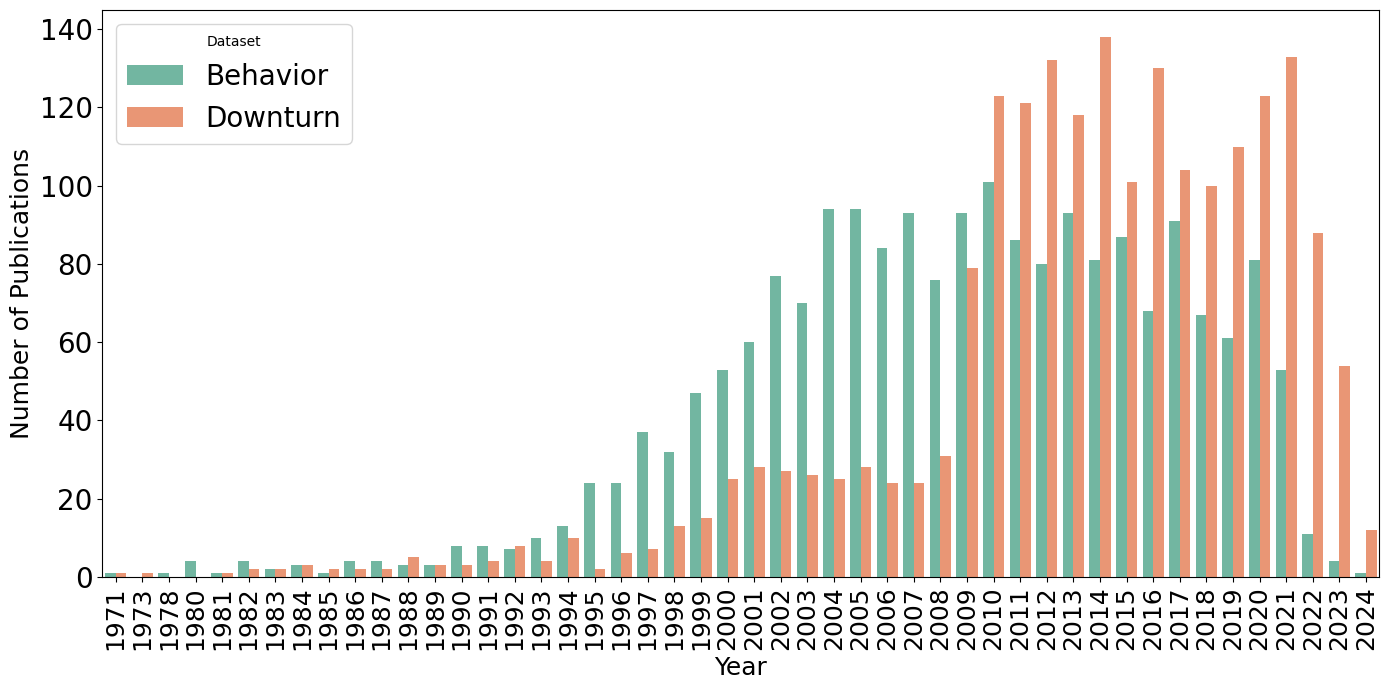

In [11]:
# 1. Publication Trends Over Time (Comparative)
plt.figure(figsize=(14, 7))
sns.countplot(x='Year', hue='Dataset', data=df_combined, palette='Set2')
# plt.title('Comparative Publication Trends', fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Publications', fontsize=18)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
plt.legend(title='Dataset', fontsize=20)
plt.tight_layout()
plt.show()

C:\Users\rituparn\AppData\Local\Temp\ipykernel_18436\2647905859.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for author, count in top_behav_authors],
C:\Users\rituparn\AppData\Local\Temp\ipykernel_18436\2647905859.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for author, count in top_downt_authors],


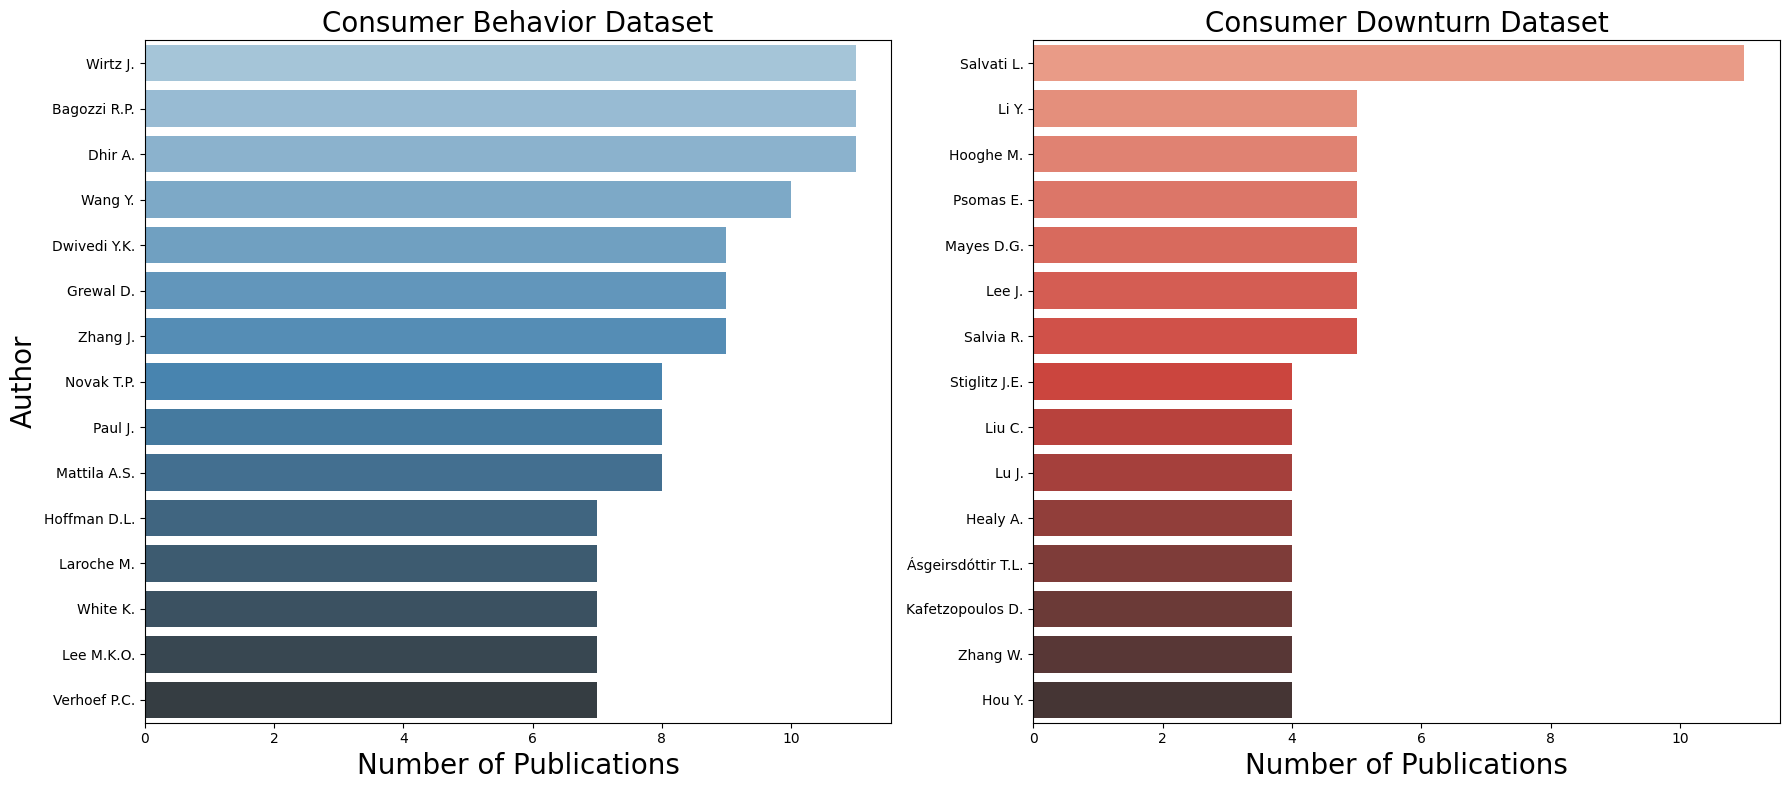

In [19]:

# 2. Most Productive Authors (Comparative)
def get_top_authors(df, n=15):
    all_authors = []
    for authors in df['Authors'].dropna():
        author_list = [a.strip() for a in authors.split(';')]
        all_authors.extend(author_list)
    return Counter(all_authors).most_common(n)

top_behav_authors = get_top_authors(df_behav)
top_downt_authors = get_top_authors(df_downt)

# Create a comparative plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
# fig.suptitle('Top Authors Comparison', fontsize=20)

sns.barplot(x=[count for author, count in top_behav_authors], 
            y=[author for author, count in top_behav_authors], 
            palette='Blues_d', ax=ax1)
ax1.set_title('Consumer Behavior Dataset', fontsize=20)
ax1.set_xlabel('Number of Publications', fontsize=20)
ax1.set_ylabel('Author', fontsize=20)

sns.barplot(x=[count for author, count in top_downt_authors], 
            y=[author for author, count in top_downt_authors], 
            palette='Reds_d', ax=ax2)
ax2.set_title('Consumer Downturn Dataset', fontsize=20)
ax2.set_xlabel('Number of Publications', fontsize=20)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [25]:
from tabulate import tabulate
# 3. Most Cited Papers (Top from each dataset)
top_cited_behav = df_behav.nlargest(5, 'Cited by')[['Title', 'Cited by', 'Year', 'Authors']]
top_cited_downt = df_downt.nlargest(5, 'Cited by')[['Title', 'Cited by', 'Year', 'Authors']]

print("Top Cited Papers - Behavior Dataset:")
print(tabulate(top_cited_behav, headers='keys', tablefmt='pretty', showindex=False))
print("\nTop Cited Papers - Downturn Dataset:")
print(tabulate(top_cited_downt, headers='keys', tablefmt='pretty', showindex=False))

print(top_cited_behav)
print(top_cited_downt)

Top Cited Papers - Behavior Dataset:
+-----------------------------------------------------------------------------------------------------------------------------+----------+------+--------------------------------------------------------+
|                                                            Title                                                            | Cited by | Year |                        Authors                         |
+-----------------------------------------------------------------------------------------------------------------------------+----------+------+--------------------------------------------------------+
|                      Understanding information systems continuance: An expectation-confirmation model                       |   6105   | 2001 |                    Bhattacherjee A.                    |
|                                    Trust and tam in online shopping: AN integrated model                                    |   5692   | 2003 |      

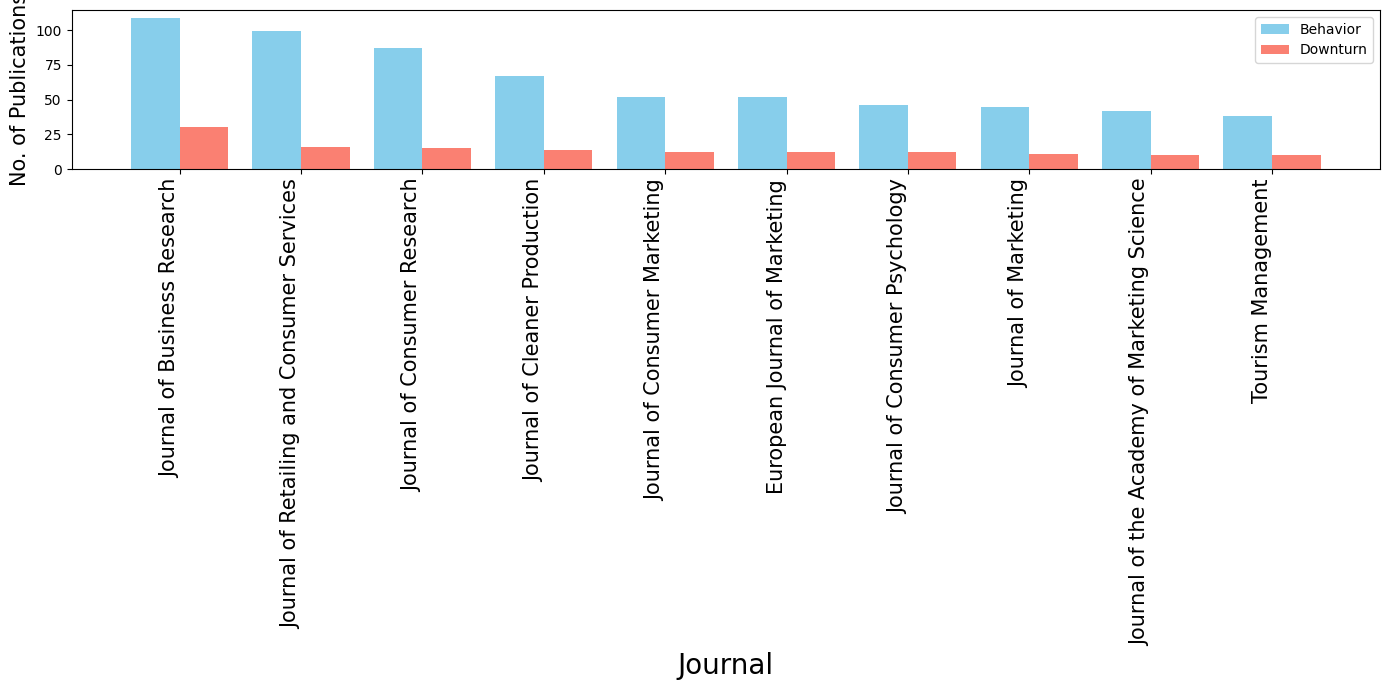

In [31]:
# 4. Journal/Source Analysis (Comparative)
top_journals_behav = df_behav['Source title'].value_counts().head(10)
top_journals_downt = df_downt['Source title'].value_counts().head(10)

plt.figure(figsize=(14, 7))
width = 0.4
x = np.arange(len(top_journals_behav))

plt.bar(x - width/2, top_journals_behav.values, width, label='Behavior', color='skyblue')
plt.bar(x + width/2, top_journals_downt.values, width, label='Downturn', color='salmon')

# plt.title('Top Journals Comparison', fontsize=20)
plt.xlabel('Journal', fontsize=20)
plt.ylabel('No. of Publications', fontsize=15)
plt.xticks(x, top_journals_behav.index, rotation=90, ha='right', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()


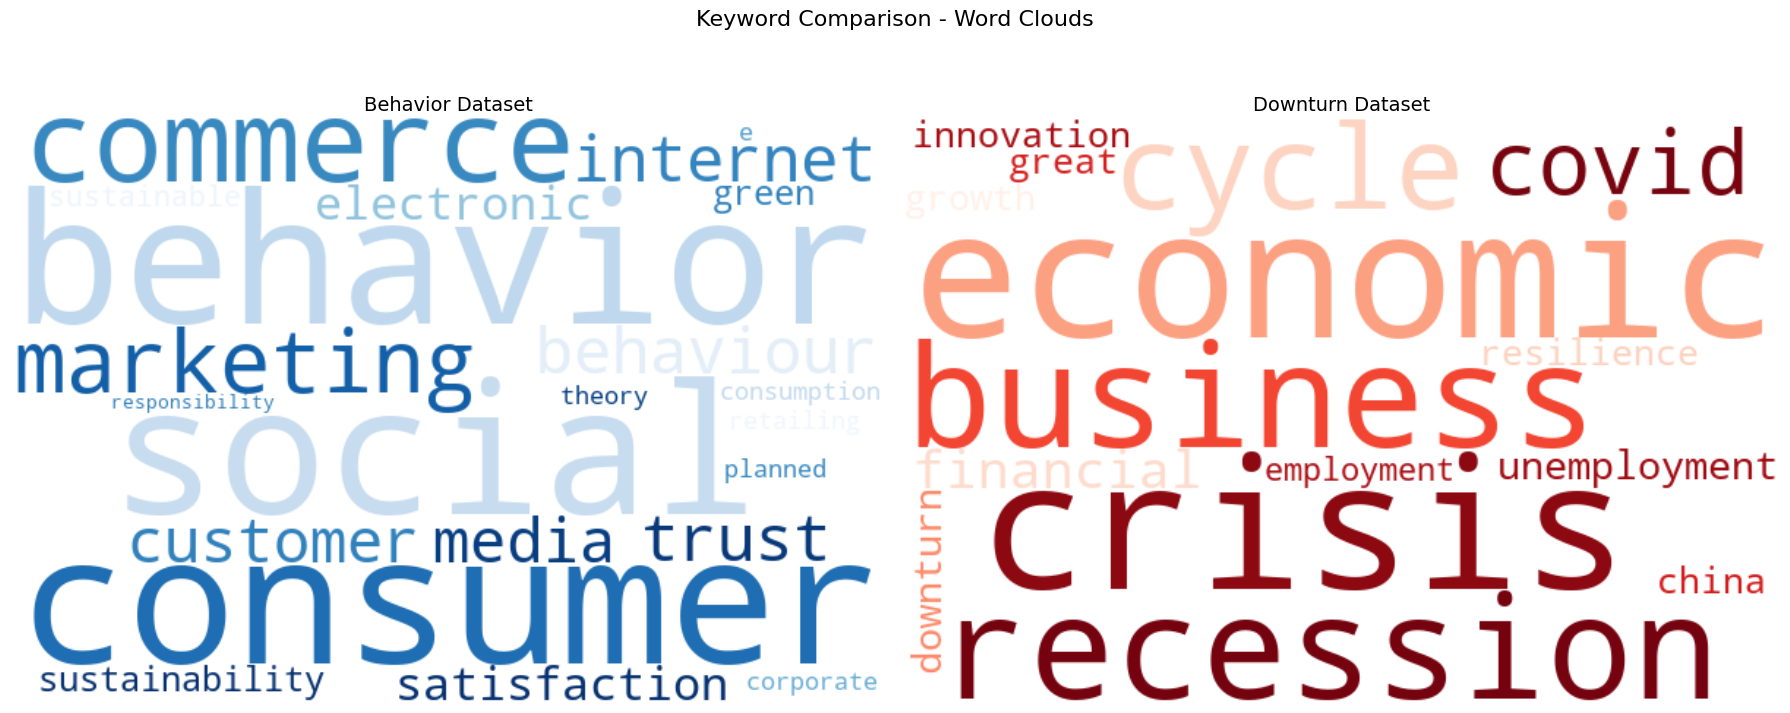

In [15]:

# 5. Keyword Analysis (Comparative)
def get_top_keywords(df, n=15):
    all_keywords = []
    for keywords in df['Author Keywords'].dropna():
        keyword_list = [k.strip().lower() for k in keywords.split(';')]
        all_keywords.extend(keyword_list)
    return Counter(all_keywords).most_common(n)

top_behav_keywords = get_top_keywords(df_behav)
top_downt_keywords = get_top_keywords(df_downt)

# Create word clouds for comparison
text_behav = ' '.join([k for k, _ in top_behav_keywords])
text_downt = ' '.join([k for k, _ in top_downt_keywords])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Keyword Comparison - Word Clouds', fontsize=16)

wordcloud1 = WordCloud(width=600, height=400, background_color='white', 
                      colormap='Blues').generate(text_behav)
ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.set_title('Behavior Dataset', fontsize=14)
ax1.axis('off')

wordcloud2 = WordCloud(width=600, height=400, background_color='white', 
                      colormap='Reds').generate(text_downt)
ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.set_title('Downturn Dataset', fontsize=14)
ax2.axis('off')

plt.tight_layout()
plt.show()

C:\Users\rituparn\AppData\Local\Temp\ipykernel_18436\688779070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Cited by', data=df_combined, palette='Set2', showfliers=False)


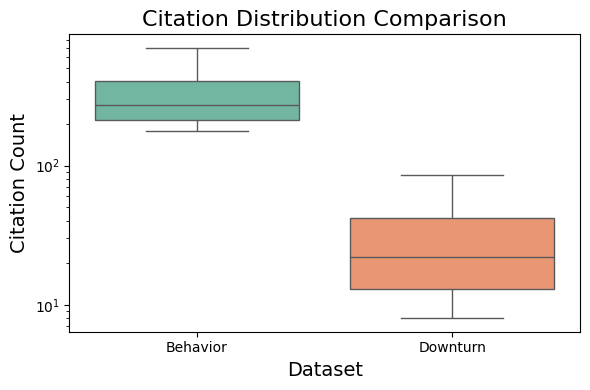

In [32]:
# 6. Citation Analysis (Comparative)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Dataset', y='Cited by', data=df_combined, palette='Set2', showfliers=False)
plt.title('Citation Distribution Comparison', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Citation Count', fontsize=14)
plt.yscale('log')  # Using log scale due to likely skewed distributions
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

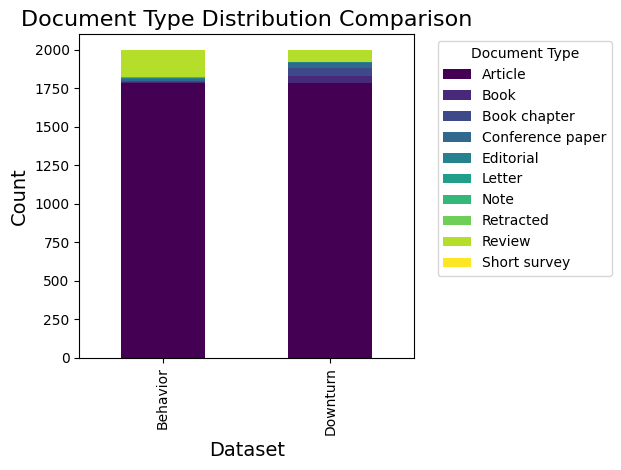

In [18]:
# 7. Document Type Analysis (Comparative)
doc_type_counts = df_combined.groupby(['Dataset', 'Document Type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
doc_type_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Document Type Distribution Comparison', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Document Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

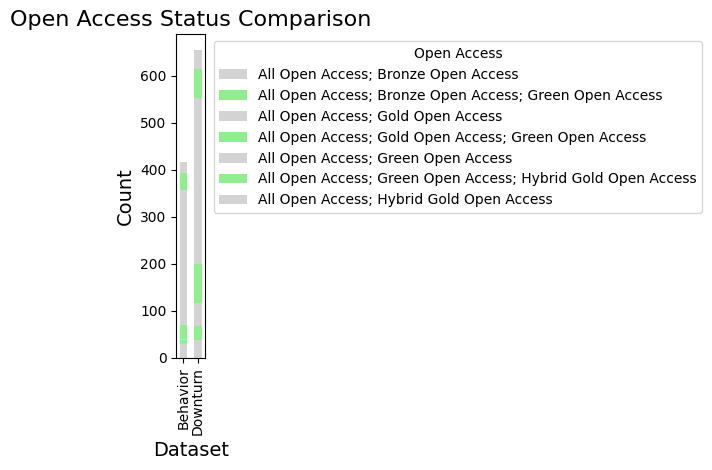

In [21]:
# 8. Open Access Status (Comparative)
open_access_counts = df_combined.groupby(['Dataset', 'Open Access']).size().unstack().fillna(0)

plt.figure(figsize=(20, 6))
open_access_counts.plot(kind='bar', stacked=True, color=['lightgray', 'lightgreen'])
plt.title('Open Access Status Comparison', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Open Access', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\rituparn\AppData\Local\Temp\ipykernel_18436\3504347986.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Cited by', hue='Dataset',


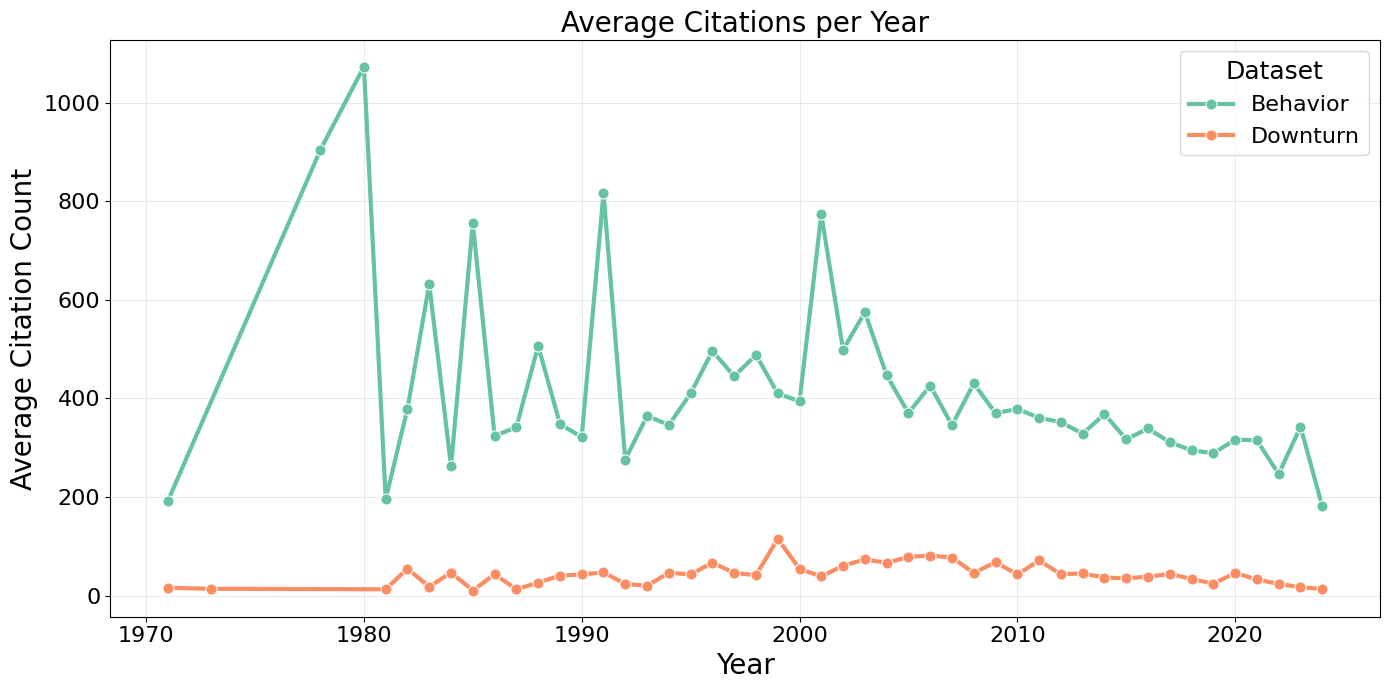

In [33]:

# 9. Temporal Citation Patterns
plt.figure(figsize=(14, 7))

# Increase line thickness and add markers
sns.lineplot(x='Year', y='Cited by', hue='Dataset', 
             data=df_combined, estimator='mean', ci=None, 
             palette='Set2', linewidth=3, marker='o', markersize=8)

# Larger font sizes (20) for title, labels, etc.
plt.title('Average Citations per Year', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Citation Count', fontsize=20)
plt.legend(title='Dataset', fontsize=16, title_fontsize=18)

# Add light grey grid in the background
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.7)

# Increase tick label font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

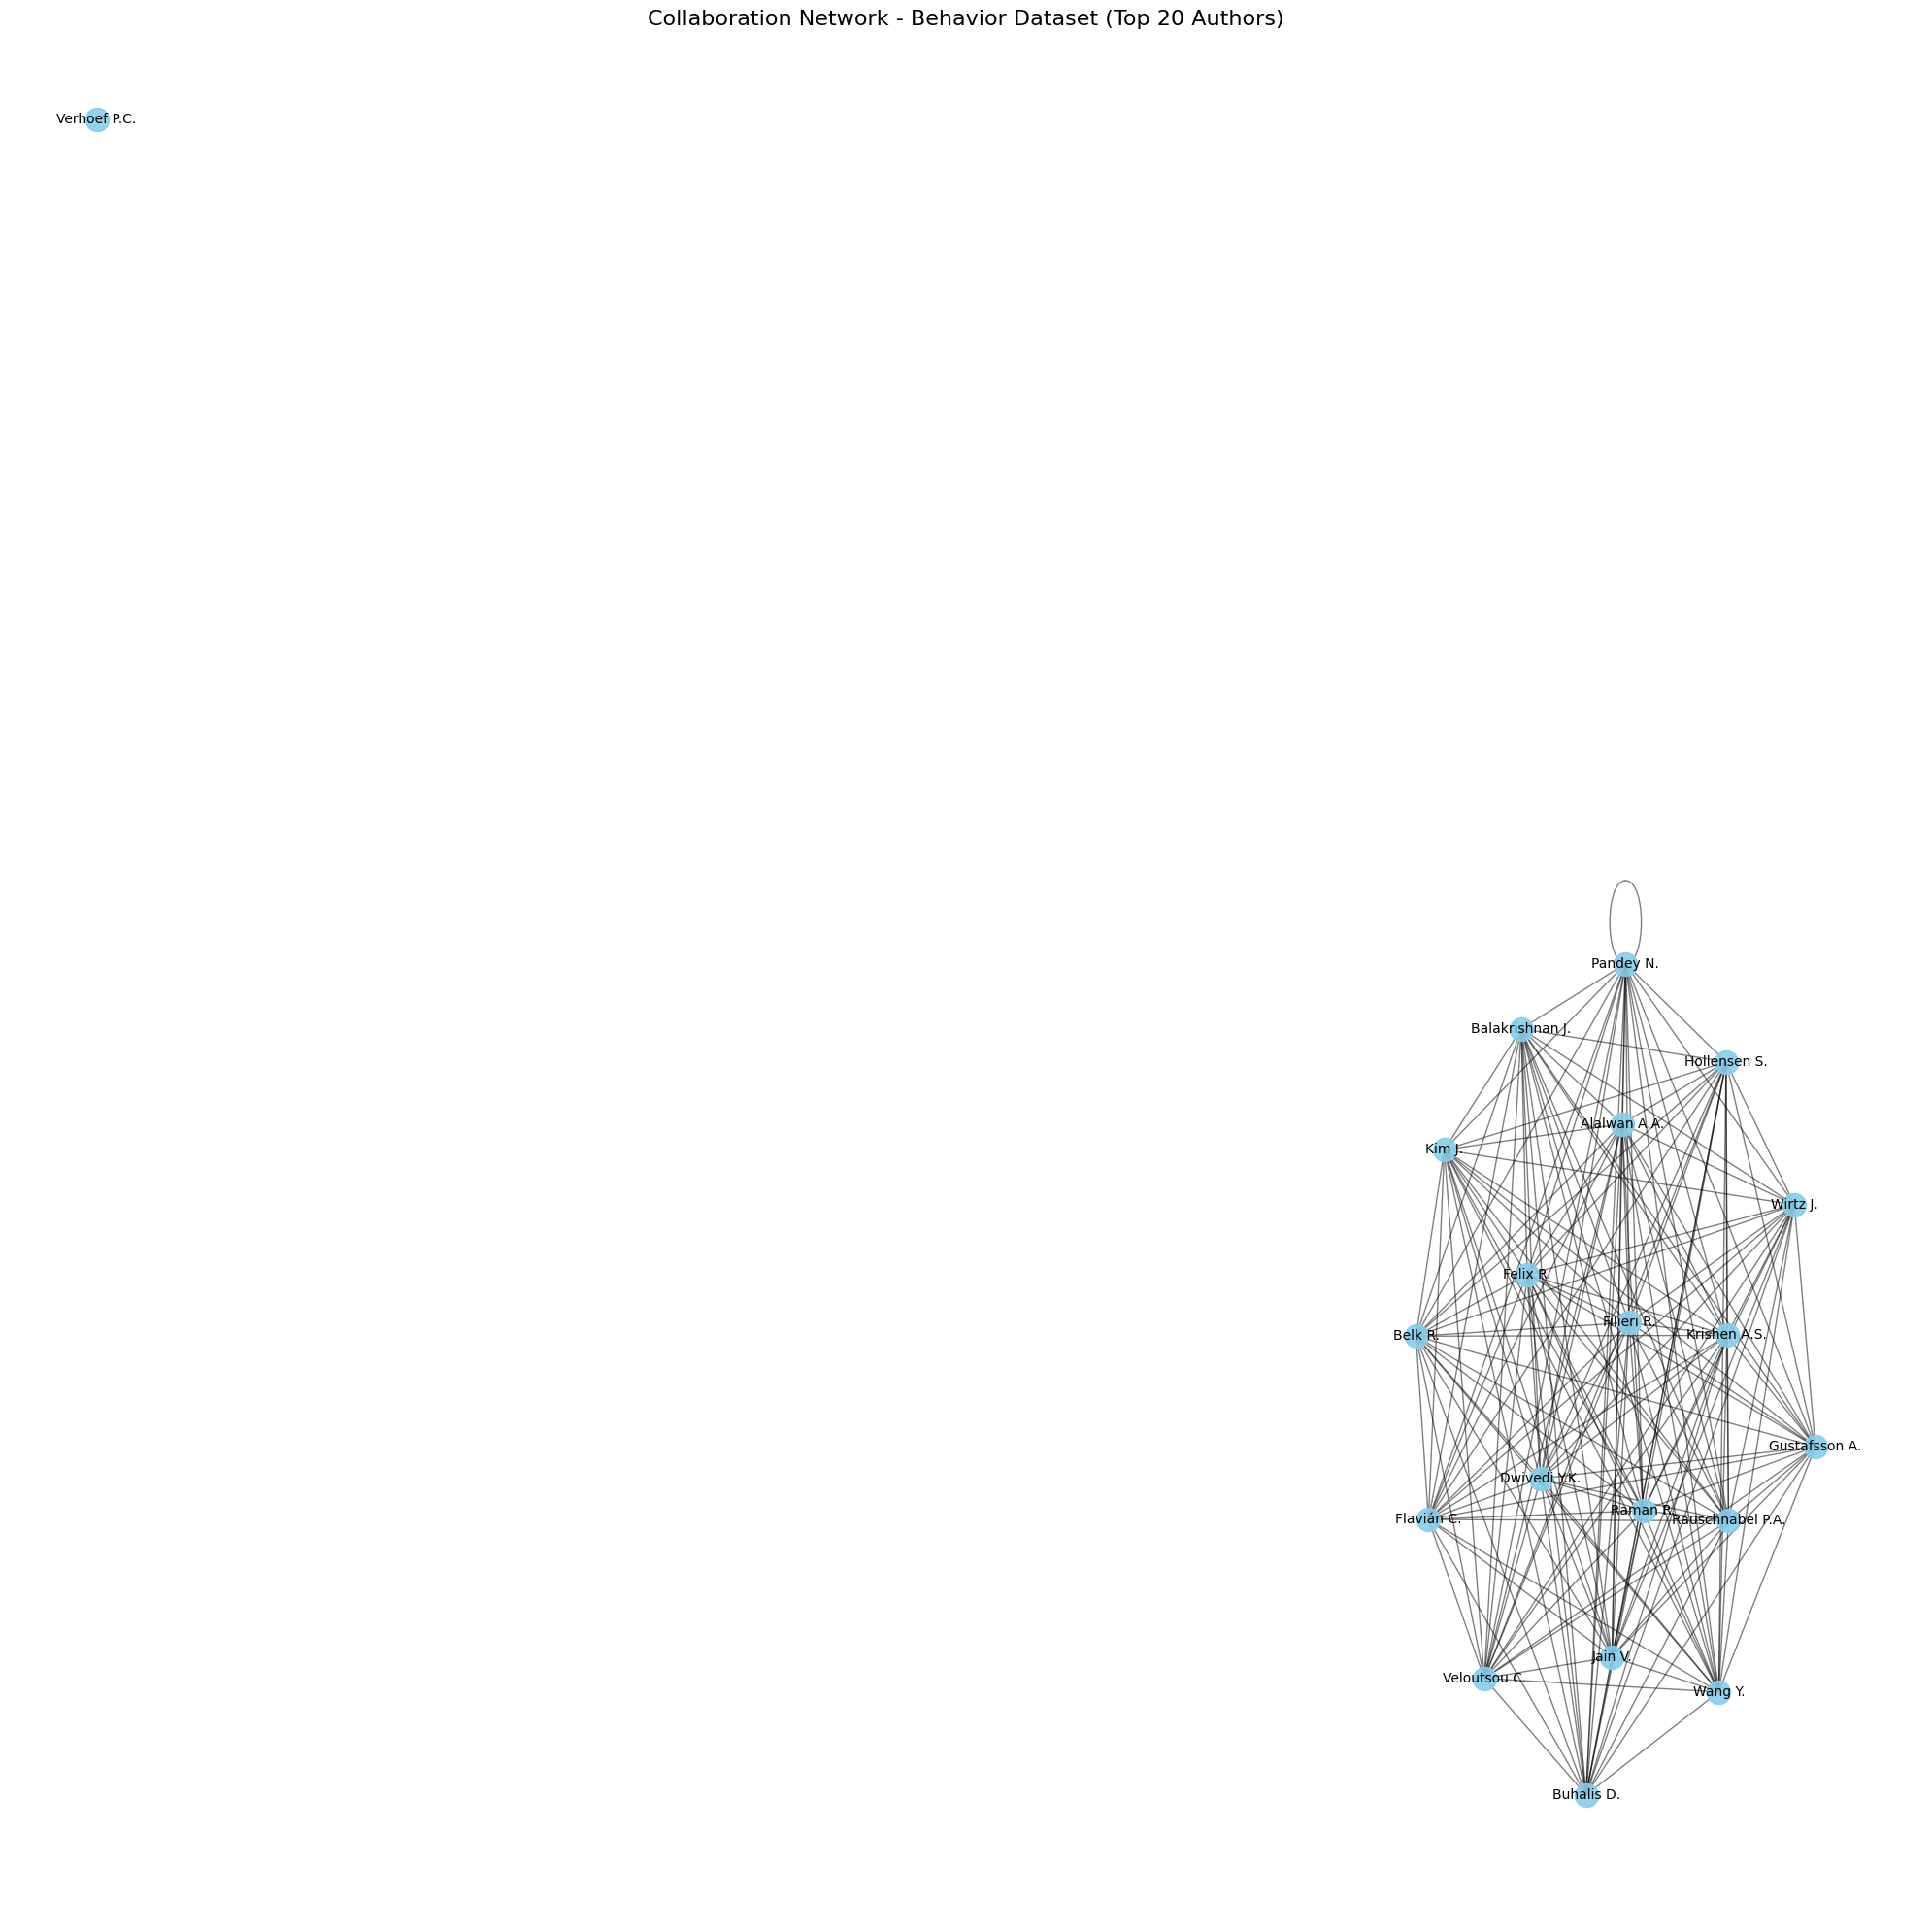

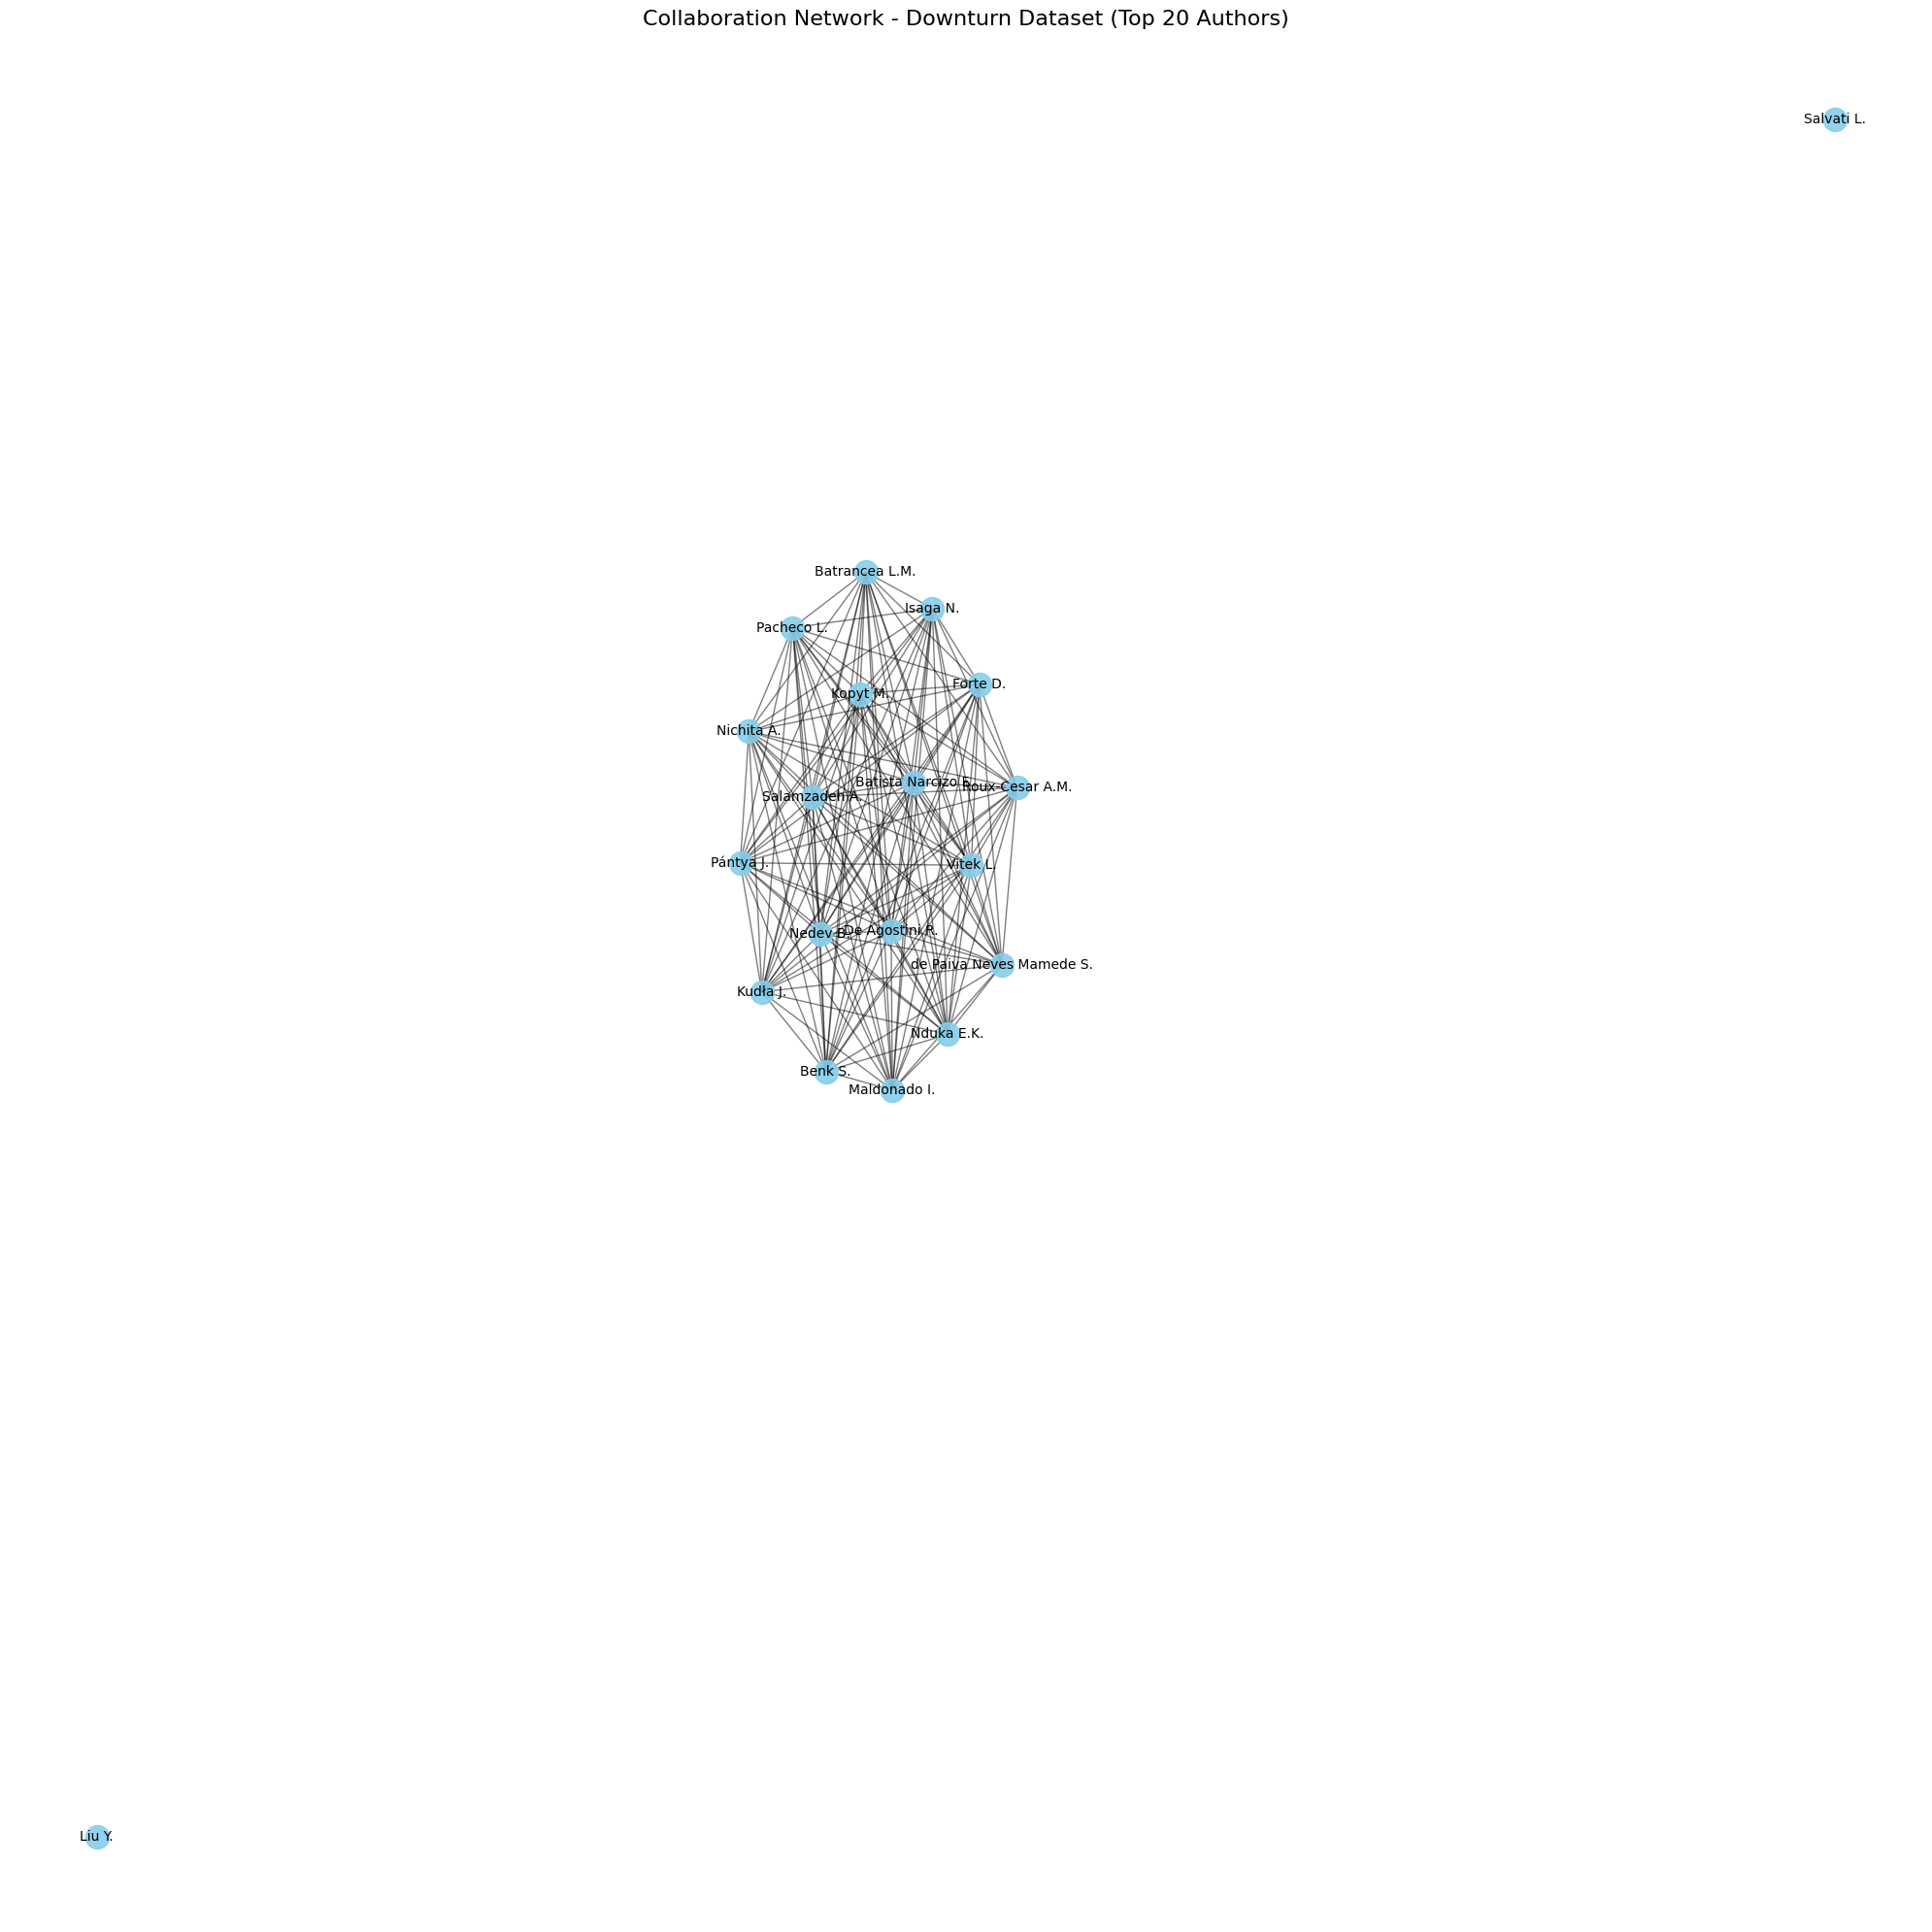

In [27]:

# 10. Author Collaboration Networks (Sample for one dataset)
def plot_collab_network(df, title):
    G = nx.Graph()
    for authors in df['Authors'].dropna():
        author_list = [a.strip() for a in authors.split(';')]
        for author in author_list:
            G.add_node(author)
        for i in range(len(author_list)):
            for j in range(i+1, len(author_list)):
                if G.has_edge(author_list[i], author_list[j]):
                    G[author_list[i]][author_list[j]]['weight'] += 1
                else:
                    G.add_edge(author_list[i], author_list[j], weight=1)
    
    # Get top 20 nodes by degree
    degrees = dict(G.degree())
    top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:20]
    top_node_names = [node[0] for node in top_nodes]
    
    # Create subgraph
    H = G.subgraph(top_node_names)
    
    plt.figure(figsize=(20,20))
    pos = nx.spring_layout(H, k=0.5)
    nx.draw_networkx_nodes(H, pos, node_size=300, node_color='skyblue', alpha=0.9)
    nx.draw_networkx_edges(H, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(H, pos, font_size=10, font_family='sans-serif')
    plt.title(f'Collaboration Network - {title} (Top 20 Authors)', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_collab_network(df_behav, 'Behavior Dataset')
plot_collab_network(df_downt, 'Downturn Dataset')